In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import unet
from unet import utils
from unet.datasets import circles

In [3]:
unet_model = unet.build_model(channels=circles.channels,
                              num_classes=circles.classes,
                              layer_depth=3,
                              filters_root=16)
unet.finalize_model(unet_model)

In [4]:
train_dataset, validation_dataset = circles.load_data(100, nx=200, ny=200, splits=(0.7, 0.3))

In [5]:
trainer = unet.Trainer(checkpoint_callback=False)
trainer.fit(unet_model,
            train_dataset,
            validation_dataset,
            epochs=5,
            batch_size=1)

Epoch 1/5
70/70 [==============================] - 28s 397ms/step - loss: 0.4188 - categorical_crossentropy: 0.4188 - categorical_accuracy: 0.9183 - mean_iou: 0.3841 - dice_coefficient: 0.7418 - auc: 0.9338 - val_loss: 0.2503 - val_categorical_crossentropy: 0.2503 - val_categorical_accuracy: 0.9529 - val_mean_iou: 0.4233 - val_dice_coefficient: 0.8122 - val_auc: 0.9295 - learning_rate: 0.0010
Epoch 2/5
70/70 [==============================] - 27s 387ms/step - loss: 0.1565 - categorical_crossentropy: 0.1565 - categorical_accuracy: 0.9526 - mean_iou: 0.5247 - dice_coefficient: 0.9190 - auc: 0.9834 - val_loss: 0.1826 - val_categorical_crossentropy: 0.1826 - val_categorical_accuracy: 0.9529 - val_mean_iou: 0.4738 - val_dice_coefficient: 0.8496 - val_auc: 0.9933 - learning_rate: 0.0010
Epoch 3/5
70/70 [==============================] - 27s 382ms/step - loss: 0.1401 - categorical_crossentropy: 0.1401 - categorical_accuracy: 0.9536 - mean_iou: 0.5536 - dice_coefficient: 0.9256 - auc: 0.9858 -

In [6]:
prediction = unet_model.predict(validation_dataset.batch(batch_size=3))

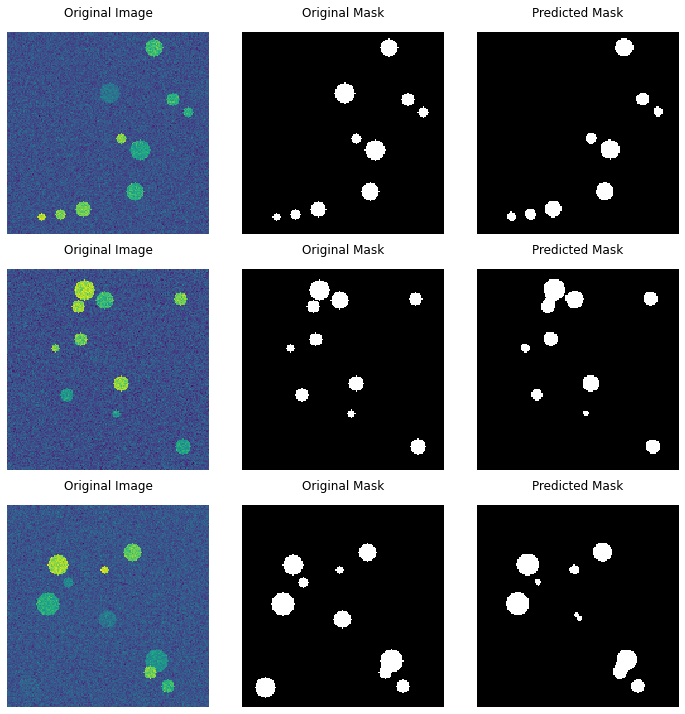

In [15]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10,10))
dataset = validation_dataset.map(utils.crop_image_and_label_to_shape(prediction.shape[1:]))

for i, (image, label) in enumerate(dataset.take(3)):
    ax[i][0].matshow(image[..., -1]); ax[i][0].set_title('Original Image'); ax[i][0].axis('off')
    ax[i][1].matshow(np.argmax(label, axis=-1), cmap=plt.cm.gray); ax[i][1].set_title('Original Mask'); ax[i][1].axis('off')
    ax[i][2].matshow(np.argmax(prediction[i,...], axis=-1), cmap=plt.cm.gray); ax[i][2].set_title('Predicted Mask'); ax[i][2].axis('off')
plt.tight_layout()